# Exploring Time Series Data

This is a short example showing you some of the nifty things you can do with time series data in pandas.

We'll be using hourly temperature data for Walla Walla from 2022, which was [downloaded from the EPA](https://aqs.epa.gov/aqsweb/airdata/download_files.html#Raw).

In [1]:
# import the packages we've been using all semester long
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This lets us display all the columns (without hiding)
pd.set_option('display.max_columns', None)

In [3]:
# Upload data file as a data frame
df = pd.read_csv("hourly-temp-2022.csv")

In [4]:
# Rename the "Sample Measurement" column to "TempF"
df = df.rename(columns={"Sample Measurement":"TempF"})
df

,Unnamed: 0,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,TempF,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,3103372,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-01-01,00:00,2022-01-01,08:00,3.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-04-29
1,3103373,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-01-01,01:00,2022-01-01,09:00,3.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-04-29
2,3103374,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-01-01,02:00,2022-01-01,10:00,3.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-04-29
3,3103375,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-01-01,03:00,2022-01-01,11:00,3.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-04-29
4,3103376,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-01-01,04:00,2022-01-01,12:00,3.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,3108453,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-07-31,19:00,2022-08-01,03:00,90.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-31
5082,3108454,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-07-31,20:00,2022-08-01,04:00,87.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-31
5083,3108455,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-07-31,21:00,2022-08-01,05:00,80.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-31
5084,3108456,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-07-31,22:00,2022-08-01,06:00,79.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-31


Notice how in this hourly dataset, the date and time are split into two columns, "Date Local" and "Time Local".
Make a new column, "Datetime," where that combines these two into the format: "2022-01-01 1:00"
Then, use pd.to_datetime() to convert it into a time stamp.

In [5]:
df["Datetime"] = pd.to_datetime(df["Date Local"] + " " + df["Time Local"])
df

,Unnamed: 0,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,TempF,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change,Datetime
0,3103372,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-01-01,00:00,2022-01-01,08:00,3.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-04-29,2022-01-01 00:00:00
1,3103373,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-01-01,01:00,2022-01-01,09:00,3.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-04-29,2022-01-01 01:00:00
2,3103374,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-01-01,02:00,2022-01-01,10:00,3.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-04-29,2022-01-01 02:00:00
3,3103375,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-01-01,03:00,2022-01-01,11:00,3.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-04-29,2022-01-01 03:00:00
4,3103376,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-01-01,04:00,2022-01-01,12:00,3.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-04-29,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,3108453,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-07-31,19:00,2022-08-01,03:00,90.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-31,2022-07-31 19:00:00
5082,3108454,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-07-31,20:00,2022-08-01,04:00,87.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-31,2022-07-31 20:00:00
5083,3108455,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-07-31,21:00,2022-08-01,05:00,80.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-31,2022-07-31 21:00:00
5084,3108456,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-07-31,22:00,2022-08-01,06:00,79.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-31,2022-07-31 22:00:00


In [6]:
# Reset the index so to the "Datetime" column
# This lets us use the "Datetime" to slice and dice our data frame
df = df.set_index(["Datetime"])

# And sort by the "Datetime" to make sure all the hours are displaying in order
df = df.sort_index()

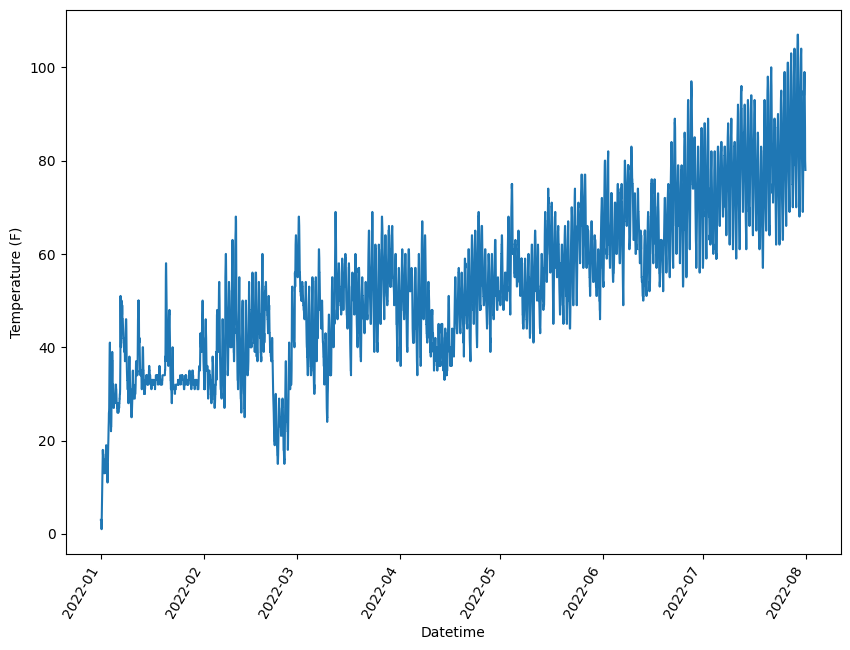

In [7]:
# Let's make a plot of the temperature for the whole year
fig, axs = plt.subplots(figsize=(10, 8))

df["TempF"].plot(kind='line', rot=60, ax=axs)


plt.xlabel("Datetime")  # custom x label using Matplotlib

plt.ylabel("Temperature (F)")

plt.show()

Because our dataframe now has a Datetime index, we can select a subset easily. Let's plot the month of June.

In [8]:
# Select the month of June
june = df.loc["2022-06"]

In [9]:
june

,Unnamed: 0,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,TempF,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,
2022-06-01 00:00:00,3106994,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-06-01,00:00,2022-06-01,08:00,57.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-03
2022-06-01 01:00:00,3106995,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-06-01,01:00,2022-06-01,09:00,54.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-03
2022-06-01 02:00:00,3106996,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-06-01,02:00,2022-06-01,10:00,53.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-03
2022-06-01 03:00:00,3106997,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-06-01,03:00,2022-06-01,11:00,54.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-03
2022-06-01 04:00:00,3106998,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-06-01,04:00,2022-06-01,12:00,54.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 19:00:00,3107709,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-06-30,19:00,2022-07-01,03:00,83.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-03
2022-06-30 20:00:00,3107710,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-06-30,20:00,2022-07-01,04:00,79.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-03
2022-06-30 21:00:00,3107711,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2022-06-30,21:00,2022-07-01,05:00,73.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-10-03


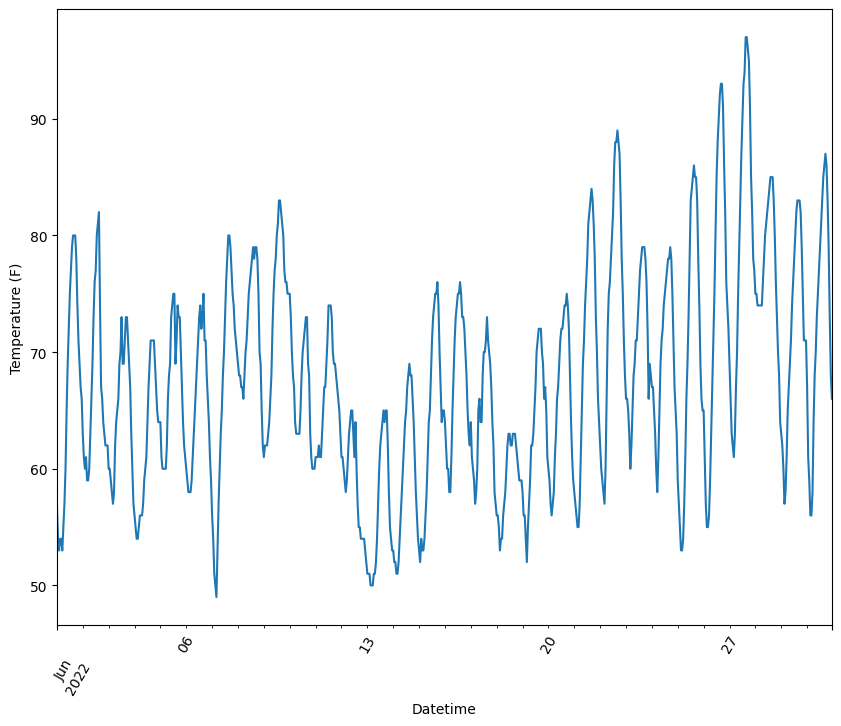

In [10]:
# And plot it
fig, axs = plt.subplots(figsize=(10, 8))

june["TempF"].plot(kind='line', rot=60, ax=axs)


plt.xlabel("Datetime")  # custom x label using Matplotlib

plt.ylabel("Temperature (F)")

plt.show()

We can also "resample" -- that is, turn it from hourly data into daily or weekly or monthly data.

To do this, we have to tell it HOW to pick: min, max, median, etc.

In [11]:
# 'Y' tells it to sample one value per year
df["TempF"].resample('Y', level=0).max()

Datetime
2022-12-31    107.0
Freq: A-DEC, Name: TempF, dtype: float64

In [12]:
# 'D' tells it to sample one value per day
df["TempF"].resample('D', level=0).max()

Datetime
2022-01-01     18.0
2022-01-02     19.0
2022-01-03     41.0
2022-01-04     39.0
2022-01-05     32.0
              ...  
2022-07-27    103.0
2022-07-28    104.0
2022-07-29    107.0
2022-07-30    104.0
2022-07-31     99.0
Freq: D, Name: TempF, Length: 212, dtype: float64

In [13]:
# 'M' tells it to sample one value per month
df["TempF"].resample('M', level=0).max()

Datetime
2022-01-31     58.0
2022-02-28     68.0
2022-03-31     69.0
2022-04-30     69.0
2022-05-31     77.0
2022-06-30     97.0
2022-07-31    107.0
Freq: M, Name: TempF, dtype: float64

So now, it's super easy to make plots of, say:
* The daily max and the daily min
* The monthly average temp
* etc.

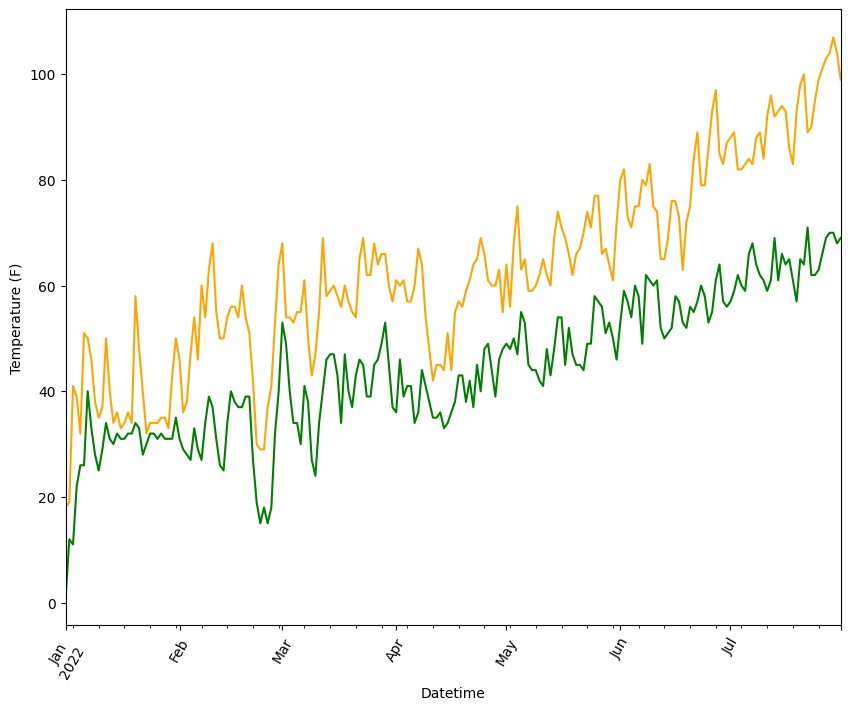

In [14]:
# Daily max and daily min on the same plot

fig, axs = plt.subplots(figsize=(10, 8))

# Daily max
df["TempF"].resample('D').max().plot(kind='line', rot=60, ax=axs, color="orange")

# Daily min
df["TempF"].resample('D').min().plot(kind='line', rot=60, ax=axs, color="green")

plt.xlabel("Datetime")  # custom x label using Matplotlib

plt.ylabel("Temperature (F)")

plt.show()